In [1]:
from google.colab import files

uploaded = files.upload()

Saving customer_segmentation_data5.csv to customer_segmentation_data5.csv


In [2]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['customer_segmentation_data5.csv']))
print(data)

     InvoiceNo StockCode                                       Description  \
0         5001    45394C            Maintain by show including feel which.   
1         5002    48883C            Middle read movement commercial total.   
2         5003    85951A         War skin blue against such whether score.   
3         5004    99886B         Usually pretty leave design student many.   
4         5005    56769B                           Seven whose government.   
..         ...       ...                                               ...   
995       5996    35478B  Order sell officer free shoulder recently visit.   
996       5997    20128C                Peace away among large let person.   
997       5998    77871C                         Someone care skill black.   
998       5999    69733B            Single memory site production million.   
999       6000    06809C             Wife toward radio life plant mission.   

     Quantity InvoiceDate  UnitPrice  CustomerID               

In [5]:
import pandas as pd

def rstr(df, pred=None):
    obs = df.shape[0]
    types = df.dtypes
    counts = df.count()
    uniques = df.apply(lambda x: x.unique())
    nulls = df.isnull().sum()
    distincts = df.apply(lambda x: x.nunique())
    missing_ratio = (df.isnull().sum() / obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt()
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ratio', 'uniques', 'skewness', 'kurtosis']
        summary = pd.concat([types, counts, distincts, nulls, missing_ratio, uniques, skewness, kurtosis], axis=1, sort=True)

    else:
        corr = df.corr()[pred]
        corr_col = 'corr_' + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ratio', 'uniques', 'skewness', 'kurtosis', corr_col]
        summary = pd.concat([types, counts, distincts, nulls, missing_ratio, uniques, skewness, kurtosis, corr], axis=1, sort=True)

    summary.columns = cols
    dtypes = summary['types'].value_counts()
    print('___________________________\nData types:\n', dtypes)
    print('___________________________')
    return summary

# Example usage:
# Replace 'data' with your actual DataFrame
details = rstr(data)
display(details.sort_values(by='missing_ratio', ascending=False))


Data shape: (1000, 8)
___________________________
Data types:
 object     4
int64      3
float64    1
Name: types, dtype: int64
___________________________


<ipython-input-5-ceb7dad3e95c>:11: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
<ipython-input-5-ceb7dad3e95c>:12: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurt()


,types,counts,distincts,nulls,missing_ratio,uniques,skewness,kurtosis
Country,object,1000,240,0,0.0,"[British Virgin Islands, Cayman Islands, Somal...",NaN,NaN
CustomerID,int64,1000,1000,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.000000,-1.200000
Description,object,1000,1000,0,0.0,"[Maintain by show including feel which., Middl...",NaN,NaN
InvoiceDate,object,1000,544,0,0.0,"[12/2/2021, 2/3/2023, 5/22/2022, 10/15/2022, 4...",NaN,NaN
InvoiceNo,int64,1000,1000,0,0.0,"[5001, 5002, 5003, 5004, 5005, 5006, 5007, 500...",0.000000,-1.200000
Quantity,int64,1000,10,0,0.0,"[10, 6, 7, 9, 8, 3, 2, 5, 1, 4]",-0.034421,-1.238728
StockCode,object,1000,997,0,0.0,"[45394C, 48883C, 85951A, 99886B, 56769B, 52672...",NaN,NaN
UnitPrice,float64,1000,952,0,0.0,"[23.87, 35.87, 76.45, 17.19, 64.85, 60.71, 23....",0.021443,-1.163998


from matplotlib import pyplot as plt
_df_0['distincts'].plot(kind='hist', bins=20, title='distincts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['skewness'].plot(kind='hist', bins=20, title='skewness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['kurtosis'].plot(kind='hist', bins=20, title='kurtosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('types').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='distincts', y='skewness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='skewness', y='kurtosis', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['counts']
  ys = series['distincts']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('counts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('types')):
  _plot_series(series, series_name, i)
  fig.legend(title='types', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('counts')
_ = plt.ylabel('distincts')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['counts']
  ys = series['skewness']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('counts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('types')):
  _plot_series(series, series_name, i)
  fig.legend(title='types', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('counts')
_ = plt.ylabel('skewness')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['counts']
  ys = series['kurtosis']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('counts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('types')):
  _plot_series(series, series_name, i)
  fig.legend(title='types', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('counts')
_ = plt.ylabel('kurtosis')

ValueError: ignored

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['counts']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'counts'}, axis=1)
              .sort_values('counts', ascending=True))
  xs = counted['counts']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('counts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('types')):
  _plot_series(series, series_name, i)
  fig.legend(title='types', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('counts')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['distincts'].plot(kind='line', figsize=(8, 4), title='distincts')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['skewness'].plot(kind='line', figsize=(8, 4), title='skewness')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['kurtosis'].plot(kind='line', figsize=(8, 4), title='kurtosis')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['types'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='distincts', y='types', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['types'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='skewness', y='types', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['types'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='kurtosis', y='types', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5500.500000,5.533000,50.061310,500.500000
std,288.819436,2.863409,28.162921,288.819436
min,5001.000000,1.000000,1.210000,1.000000
25%,5250.750000,3.000000,26.147500,250.750000
50%,5500.500000,6.000000,48.930000,500.500000
75%,5750.250000,8.000000,73.892500,750.250000
max,6000.000000,10.000000,99.880000,1000.000000


In [7]:
print('Check register with UnitPrice negative:')
display(data[(data.UnitPrice<0)])
print("Sales records with Customer ID and zero in Unit Price:",data[(data.UnitPrice==0)  & ~(data.CustomerID.isnull())].shape[0])
data[(data.UnitPrice==0)  & ~(data.CustomerID.isnull())]

Check register with UnitPrice negative:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Sales records with Customer ID and zero in Unit Price: 0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [8]:
# Remove register withou CustomerID
data = data[~(data.CustomerID.isnull())]

# Remove negative or return transactions
data = data[~(data.Quantity<0)]
data = data[data.UnitPrice>0]

details = rstr(data)
display(details.sort_values(by='distincts', ascending=False))


Data shape: (1000, 8)
___________________________
Data types:
 object     4
int64      3
float64    1
Name: types, dtype: int64
___________________________


<ipython-input-5-ceb7dad3e95c>:11: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
<ipython-input-5-ceb7dad3e95c>:12: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurt()


,types,counts,distincts,nulls,missing_ratio,uniques,skewness,kurtosis
CustomerID,int64,1000,1000,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.000000,-1.200000
Description,object,1000,1000,0,0.0,"[Maintain by show including feel which., Middl...",NaN,NaN
InvoiceNo,int64,1000,1000,0,0.0,"[5001, 5002, 5003, 5004, 5005, 5006, 5007, 500...",0.000000,-1.200000
StockCode,object,1000,997,0,0.0,"[45394C, 48883C, 85951A, 99886B, 56769B, 52672...",NaN,NaN
UnitPrice,float64,1000,952,0,0.0,"[23.87, 35.87, 76.45, 17.19, 64.85, 60.71, 23....",0.021443,-1.163998
InvoiceDate,object,1000,544,0,0.0,"[12/2/2021, 2/3/2023, 5/22/2022, 10/15/2022, 4...",NaN,NaN
Country,object,1000,240,0,0.0,"[British Virgin Islands, Cayman Islands, Somal...",NaN,NaN
Quantity,int64,1000,10,0,0.0,"[10, 6, 7, 9, 8, 3, 2, 5, 1, 4]",-0.034421,-1.238728


In [12]:
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)
data['amount'] = data.Quantity*data.UnitPrice
data.CustomerID = data.CustomerID.astype('Int64')

details = rstr(data)
display(details.sort_values(by='distincts', ascending=False))

Data shape: (1000, 9)
___________________________
Data types:
 object            3
int64             2
float64           2
Int64             1
datetime64[ns]    1
Name: types, dtype: int64
___________________________


<ipython-input-5-ceb7dad3e95c>:11: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
<ipython-input-5-ceb7dad3e95c>:12: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurt()


,types,counts,distincts,nulls,missing_ratio,uniques,skewness,kurtosis
CustomerID,Int64,1000,1000,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.000000,-1.200000
Description,object,1000,1000,0,0.0,"[Maintain by show including feel which., Middl...",NaN,NaN
InvoiceNo,int64,1000,1000,0,0.0,"[5001, 5002, 5003, 5004, 5005, 5006, 5007, 500...",0.000000,-1.200000
StockCode,object,1000,997,0,0.0,"[45394C, 48883C, 85951A, 99886B, 56769B, 52672...",NaN,NaN
amount,float64,1000,989,0,0.0,"[238.70000000000002, 215.21999999999997, 535.1...",0.910910,0.102067
UnitPrice,float64,1000,952,0,0.0,"[23.87, 35.87, 76.45, 17.19, 64.85, 60.71, 23....",0.021443,-1.163998
InvoiceDate,datetime64[ns],1000,544,0,0.0,"[2021-12-02T00:00:00.000000000, 2023-02-03T00:...",NaN,NaN
Country,object,1000,240,0,0.0,"[British Virgin Islands, Cayman Islands, Somal...",NaN,NaN
Quantity,int64,1000,10,0,0.0,"[10, 6, 7, 9, 8, 3, 2, 5, 1, 4]",-0.034421,-1.238728


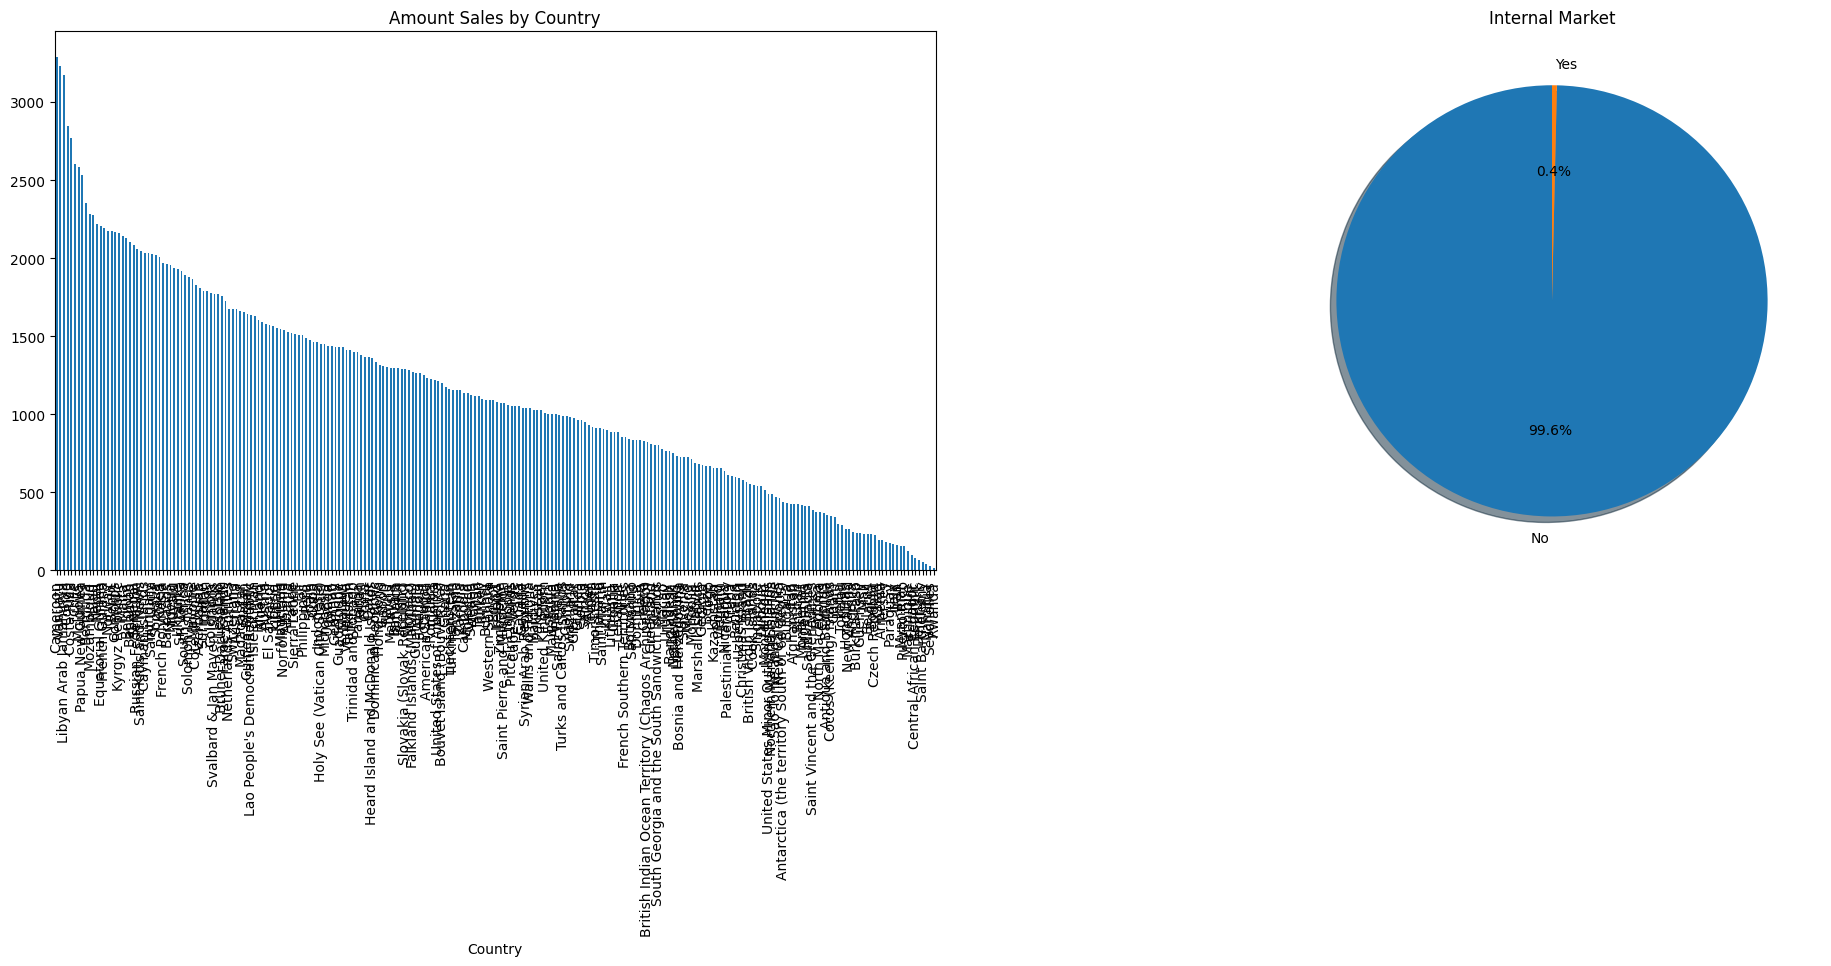

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 7))

f1 = fig.add_subplot(121)
data.groupby(["Country"]).amount.sum().sort_values(ascending=False).plot(kind='bar', title='Amount Sales by Country', ax=f1)

data['Internal'] = data.Country.apply(lambda x: 'Yes' if x == 'United Kingdom' else 'No')

f2 = fig.add_subplot(122)
market = data.groupby(["Internal"]).amount.sum().sort_values(ascending=False)
plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Internal Market')

plt.show()


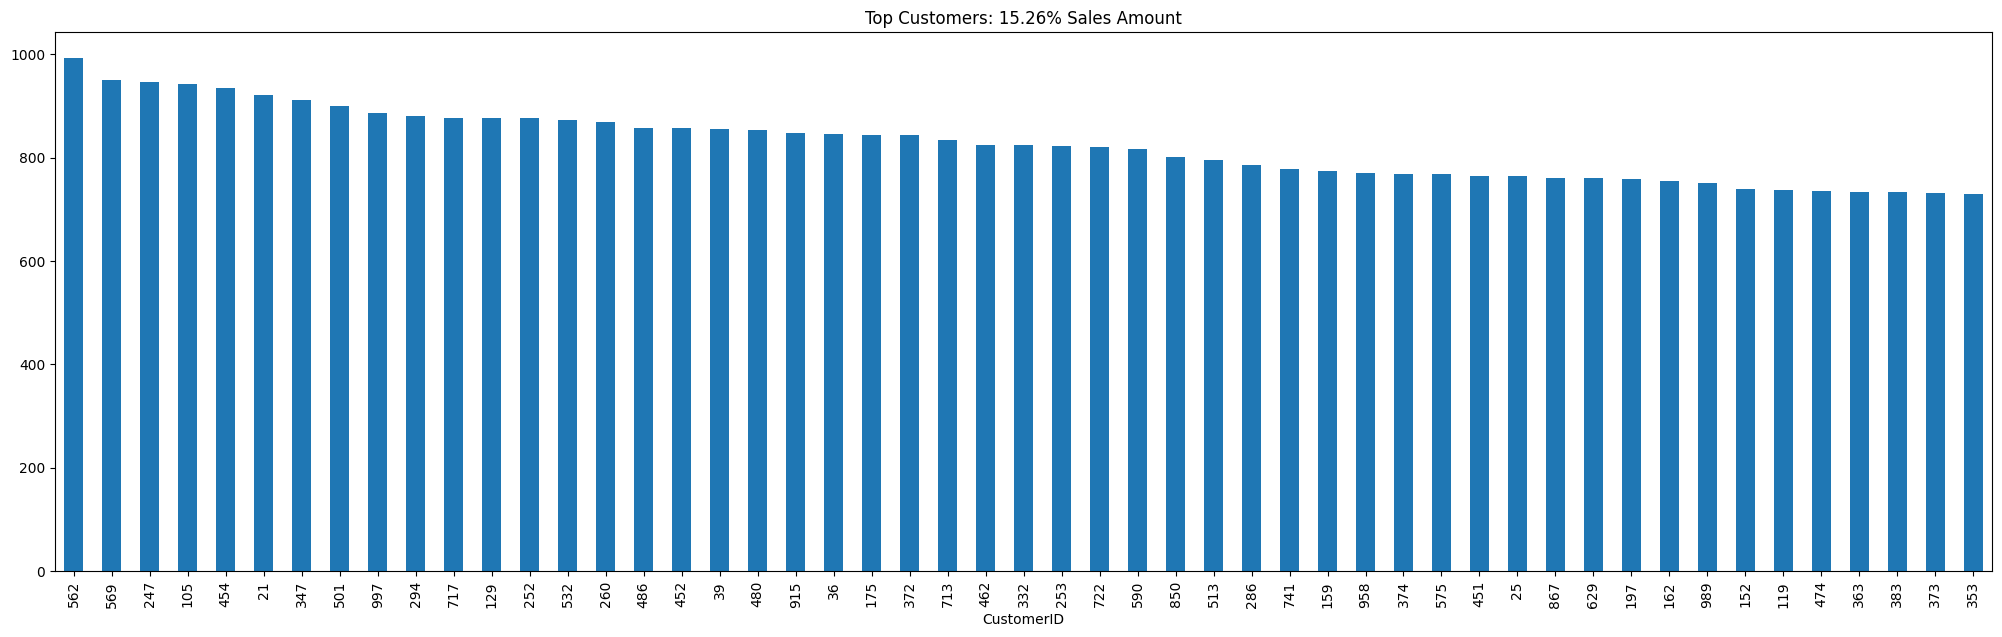

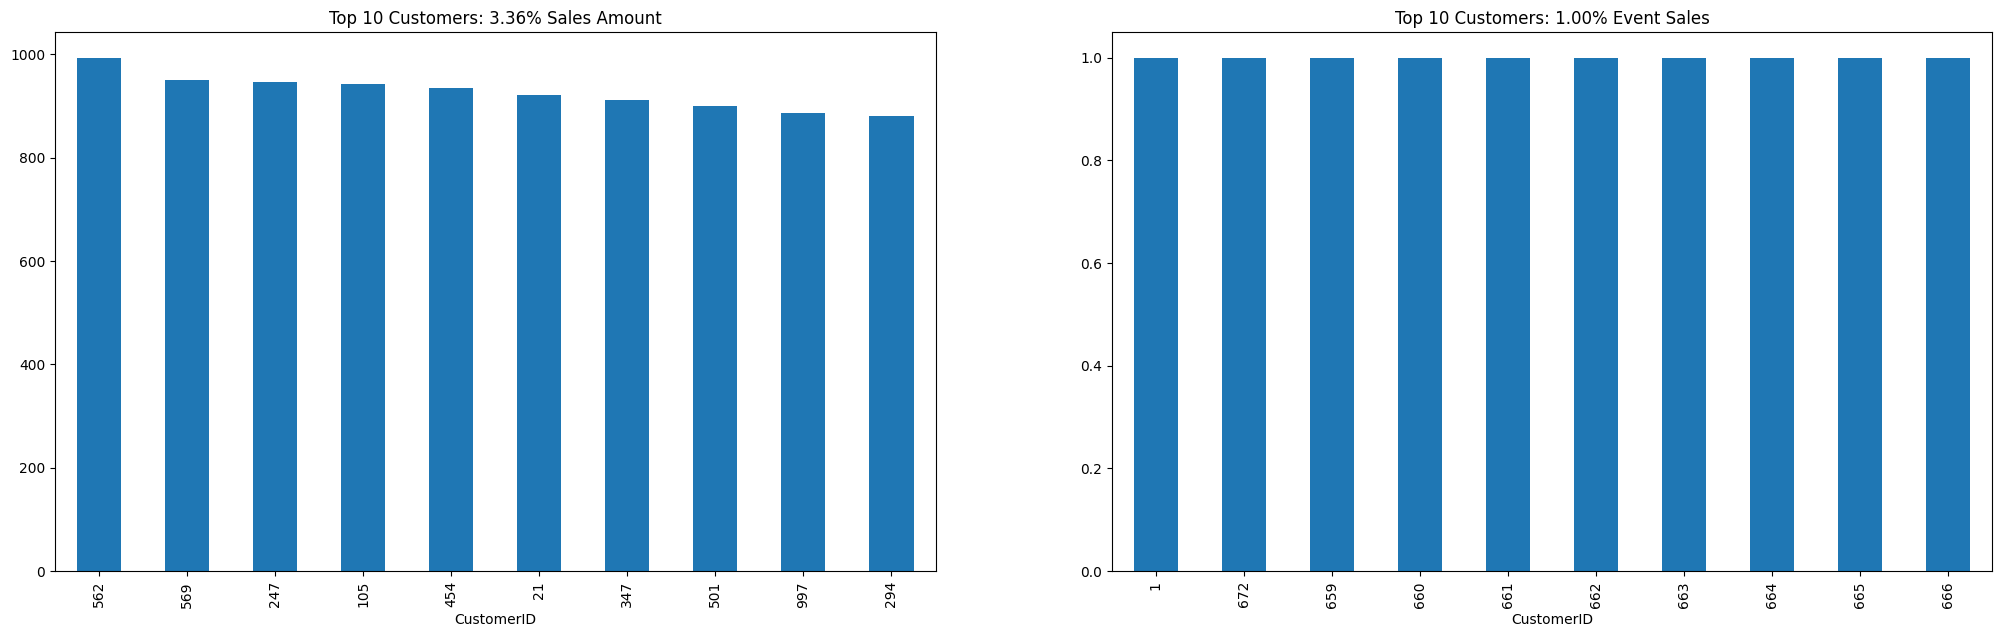

In [17]:
import numpy as np

fig = plt.figure(figsize=(25, 7))

# Plotting top 51 customers by sales amount
PercentSales = np.round((data.groupby(["CustomerID"]).amount.sum().sort_values(ascending=False)[:51].sum() / data.groupby(["CustomerID"]).amount.sum().sort_values(ascending=False).sum()) * 100, 2)
g = data.groupby(["CustomerID"]).amount.sum().sort_values(ascending=False)[:51].plot(kind='bar', title='Top Customers: {:3.2f}% Sales Amount'.format(PercentSales))

# Creating a new figure for the next set of plots
fig = plt.figure(figsize=(25, 7))

# Plotting top 10 customers by sales amount
f1 = fig.add_subplot(121)
PercentSales = np.round((data.groupby(["CustomerID"]).amount.sum().sort_values(ascending=False)[:10].sum() / data.groupby(["CustomerID"]).amount.sum().sort_values(ascending=False).sum()) * 100, 2)
g = data.groupby(["CustomerID"]).amount.sum().sort_values(ascending=False)[:10].plot(kind='bar', title='Top 10 Customers: {:3.2f}% Sales Amount'.format(PercentSales), ax=f1)

# Plotting top 10 customers by event count
f2 = fig.add_subplot(122)
PercentSales = np.round((data.groupby(["CustomerID"]).amount.count().sort_values(ascending=False)[:10].sum() / data.groupby(["CustomerID"]).amount.count().sort_values(ascending=False).sum()) * 100, 2)
g = data.groupby(["CustomerID"]).amount.count().sort_values(ascending=False)[:10].plot(kind='bar', title='Top 10 Customers: {:3.2f}% Event Sales'.format(PercentSales), ax=f2)

plt.show()


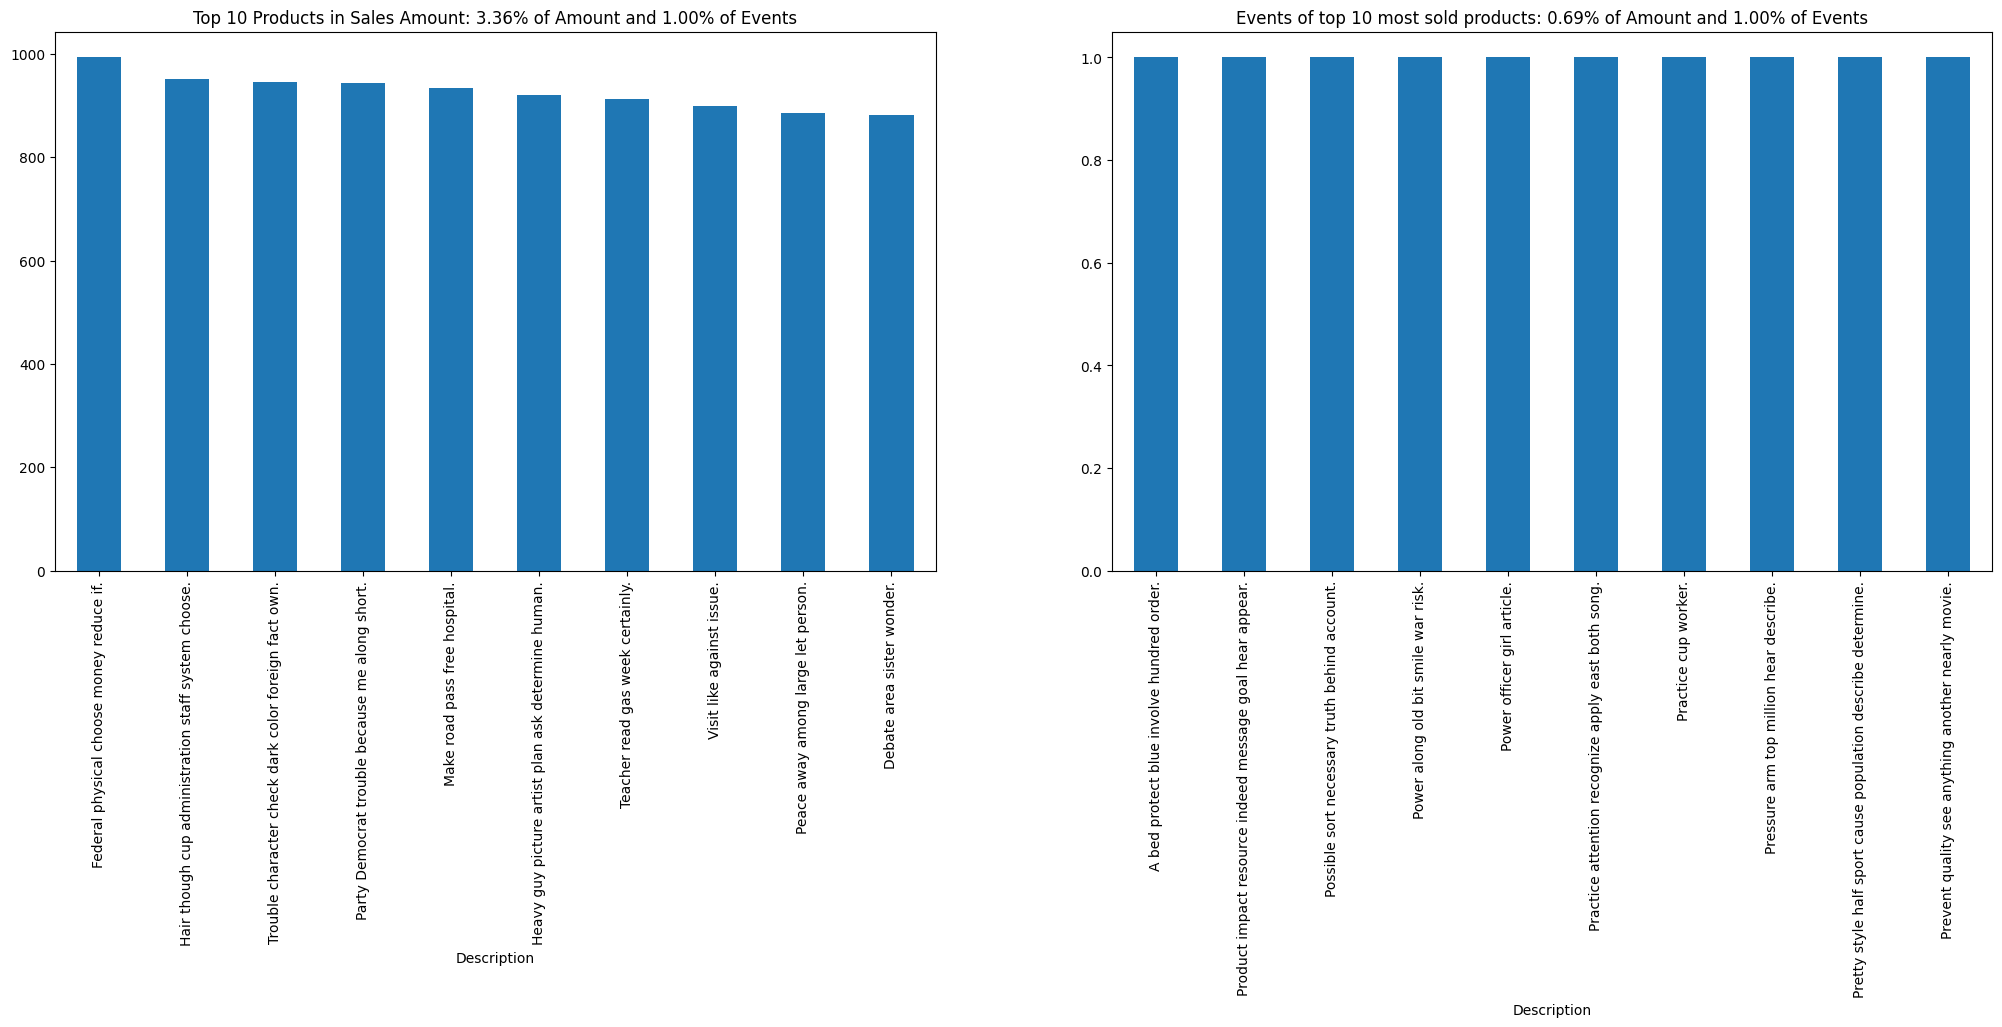

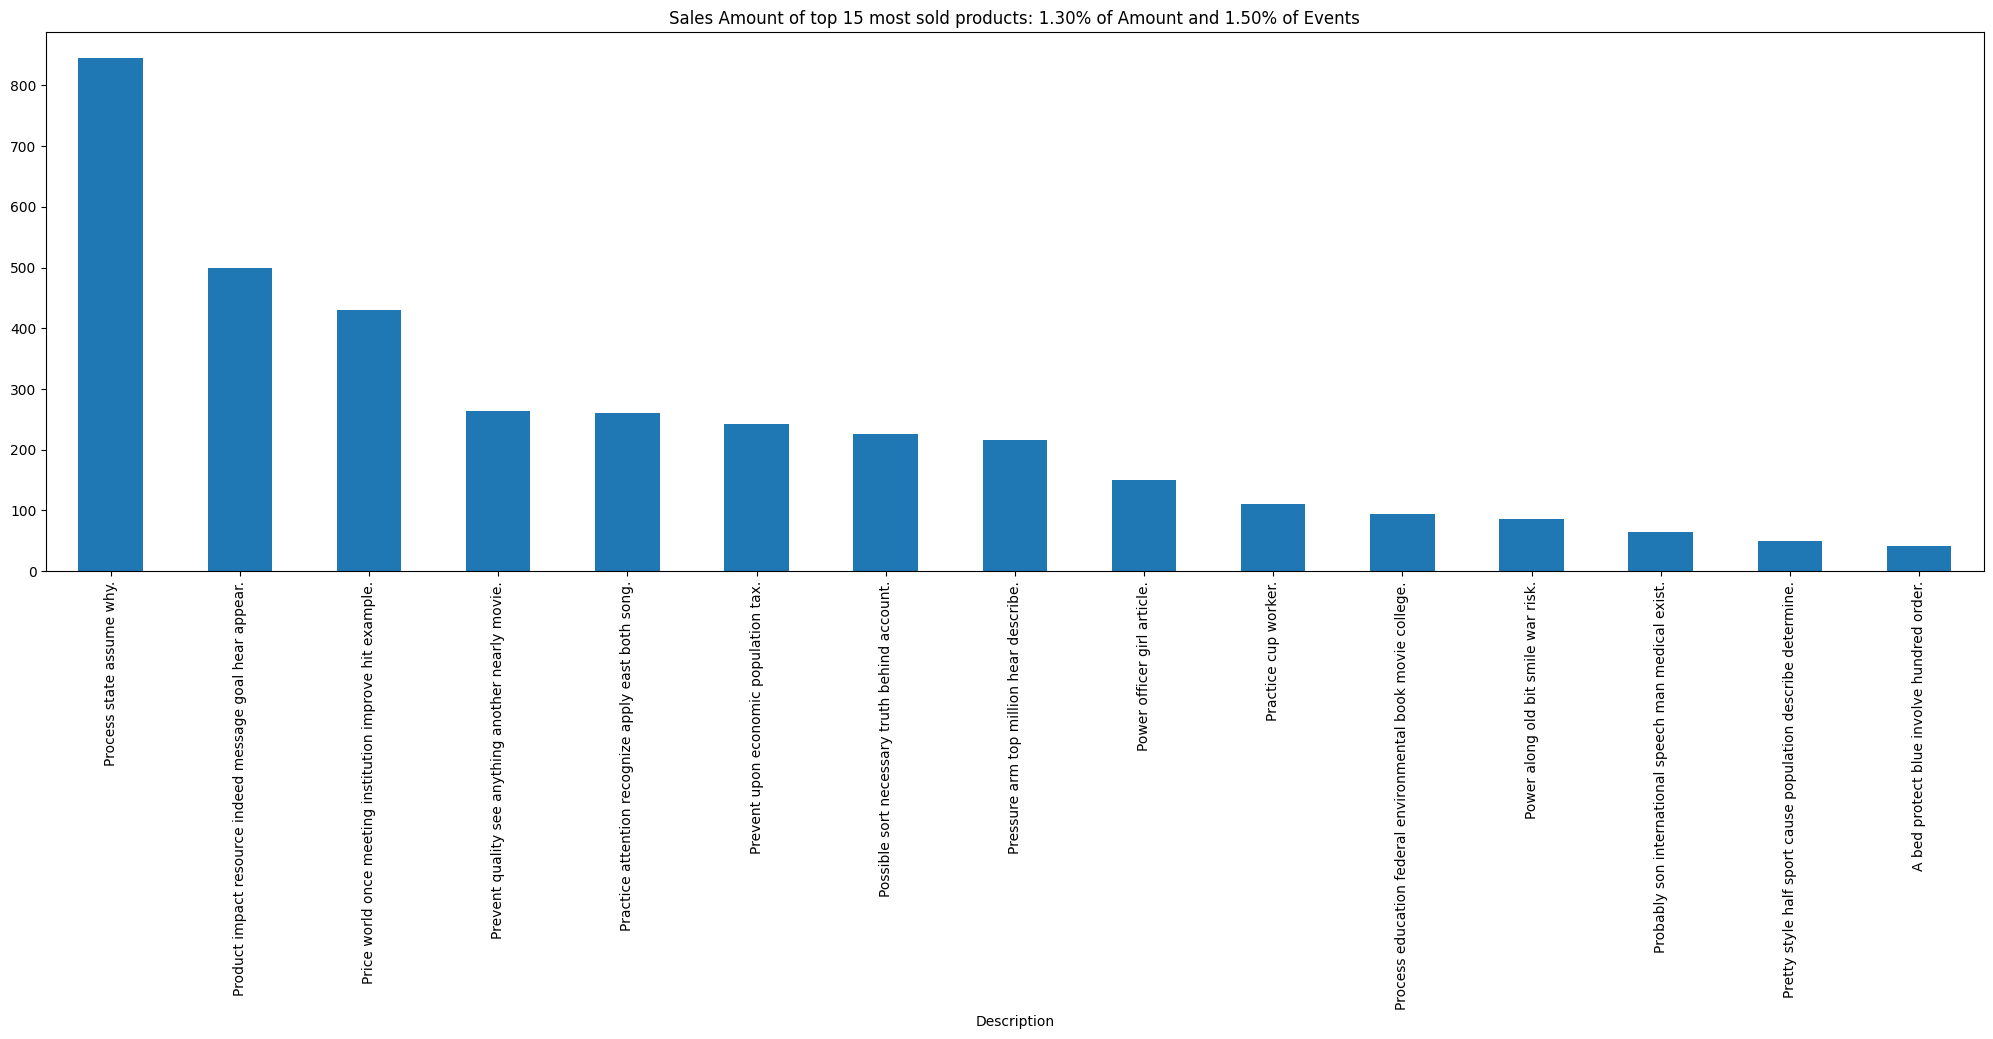

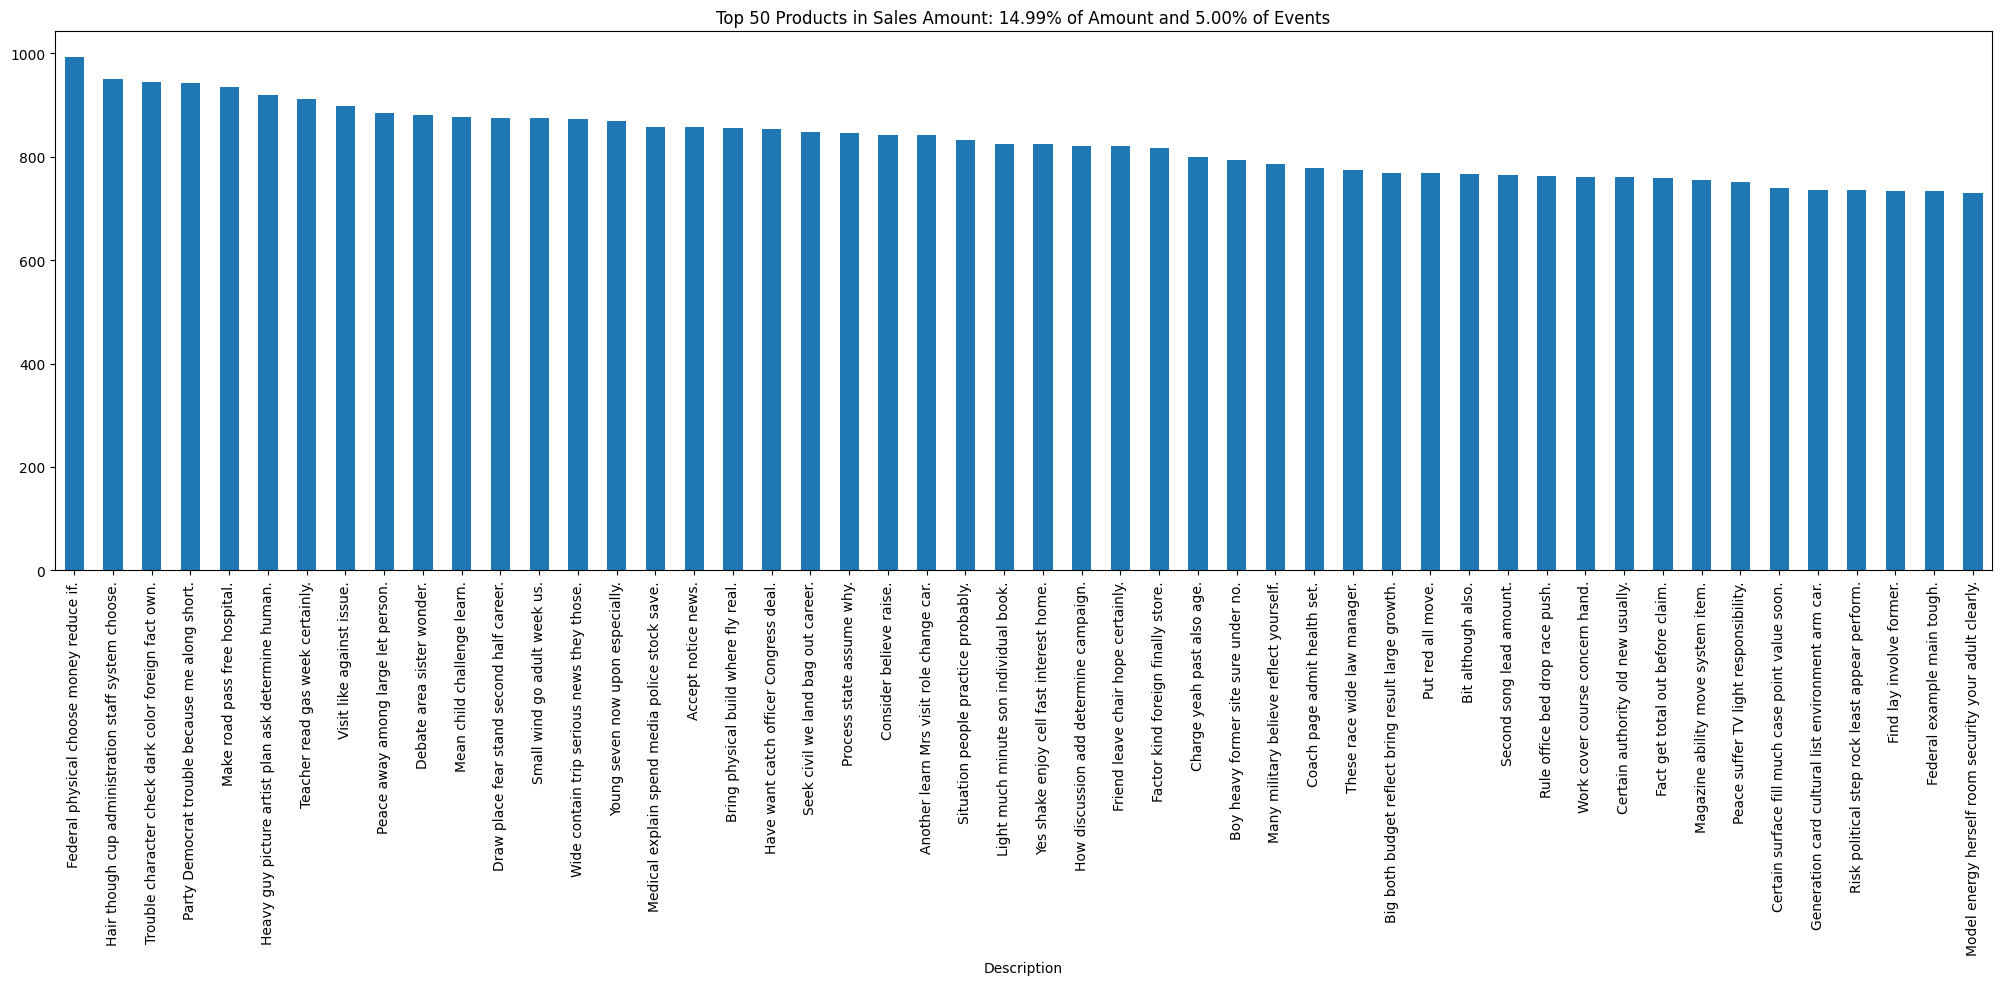

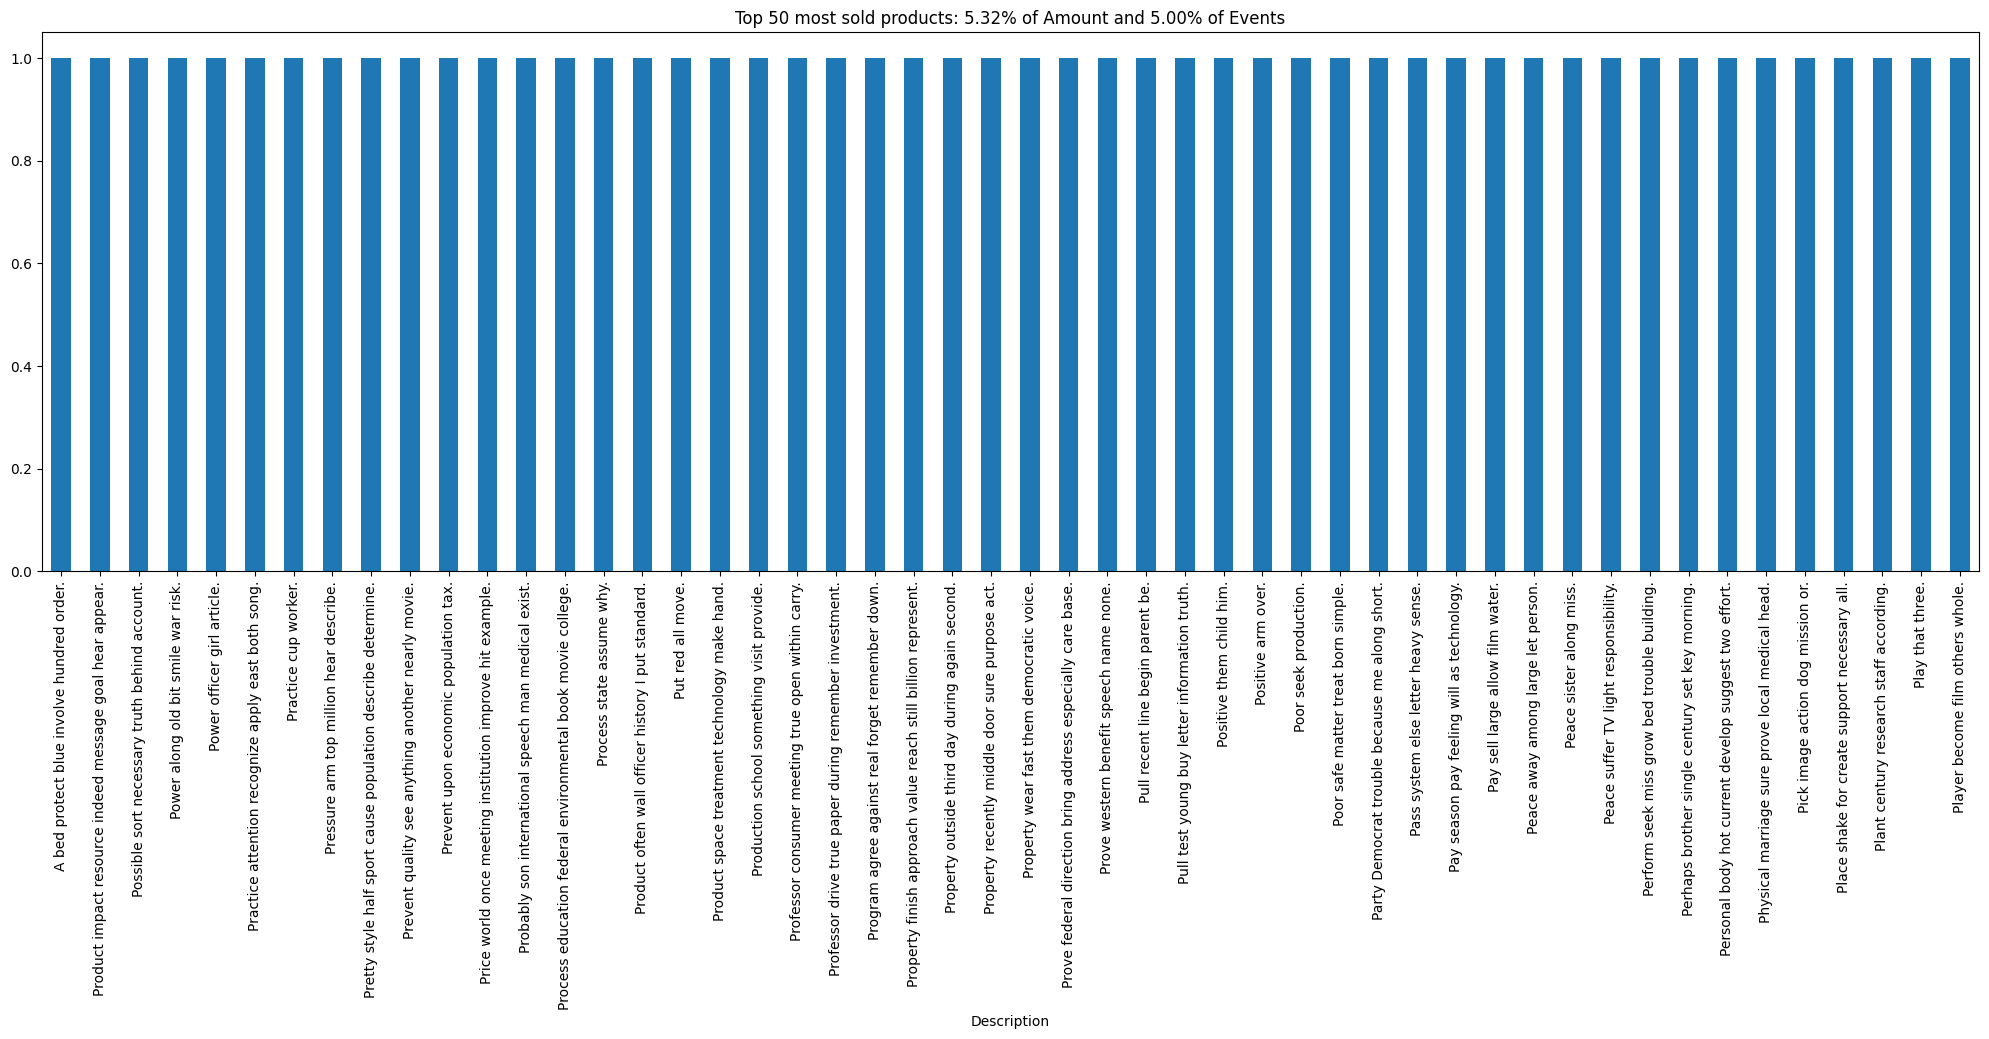

In [18]:
AmoutSum = data.groupby(["Description"]).amount.sum().sort_values(ascending=False)
inv = data[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().agg(np.size).sort_values(ascending=False)

fig = plt.figure(figsize=(25, 7))

f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales = np.round((AmoutSum[Top10].sum() / AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10].sum() / inv.sum()) * 100, 2)
g = AmoutSum[Top10].plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.format(PercentSales, PercentEvents))

f2 = fig.add_subplot(122)
Top10Ev = list(inv[:10].index)
PercentSales = np.round((AmoutSum[Top10Ev].sum() / AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10Ev].sum() / inv.sum()) * 100, 2)
g = inv[Top10Ev].plot(kind='bar', title='Events of top 10 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.format(PercentSales, PercentEvents))

fig = plt.figure(figsize=(25, 7))

Top15ev = list(inv[:15].index)
PercentSales = np.round((AmoutSum[Top15ev].sum() / AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top15ev].sum() / inv.sum()) * 100, 2)
g = AmoutSum[Top15ev].sort_values(ascending=False).plot(kind='bar', title='Sales Amount of top 15 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.format(PercentSales, PercentEvents))

fig = plt.figure(figsize=(25, 7))

Top50 = list(AmoutSum[:50].index)
PercentSales = np.round((AmoutSum[Top50].sum() / AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top50].sum() / inv.sum()) * 100, 2)
g = AmoutSum[Top50].plot(kind='bar', title='Top 50 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.format(PercentSales, PercentEvents))

fig = plt.figure(figsize=(25, 7))

Top50Ev = list(inv[:50].index)
PercentSales = np.round((AmoutSum[Top50Ev].sum() / AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top50Ev].sum() / inv.sum()) * 100, 2)
g = inv[Top50Ev].plot(kind='bar', title='Top 50 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.format(PercentSales, PercentEvents))


In [23]:
import datetime

# Calculate Recency
max_date = data['InvoiceDate'].max()
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Recency'] = (max_date - data['InvoiceDate']).dt.days

# Print the Recency column
print(data['Recency'])

reference_date = data['InvoiceDate'].max() + datetime.timedelta(days=1)  # Corrected typo in 'reference_date'
print('Reference Date:', reference_date)
data['days_since_last_purchase'] = (reference_date - data['InvoiceDate']).astype('timedelta64[D]')
customer_history_df = data[['CustomerID', 'days_since_last_purchase']].groupby("CustomerID").min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase': 'recency'}, inplace=True)
customer_history_df.describe().transpose()


0      719
1      291
2      548
3      402
4      582
      ... 
995    719
996    225
997      1
998    667
999    730
Name: Recency, Length: 1000, dtype: int64
Reference Date: 2023-11-22 00:00:00


,count,mean,std,min,25%,50%,75%,max
CustomerID,1000.0,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
recency,1000.0,357.465,216.38454,1.0,169.5,352.5,546.25,731.0


In [ ]:
# Calculate Frequency
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Calculate Monetary Value
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
monetary_value = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_value.columns = ['CustomerID', 'MonetaryValue']

# Merge RFM metrics into one DataFrame
rfm = frequency.merge(monetary_value, on='CustomerID')
rfm = rfm.merge(data[['CustomerID', 'Recency']].drop_duplicates(), on='CustomerID')


<ipython-input-52-45903822bd8e>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


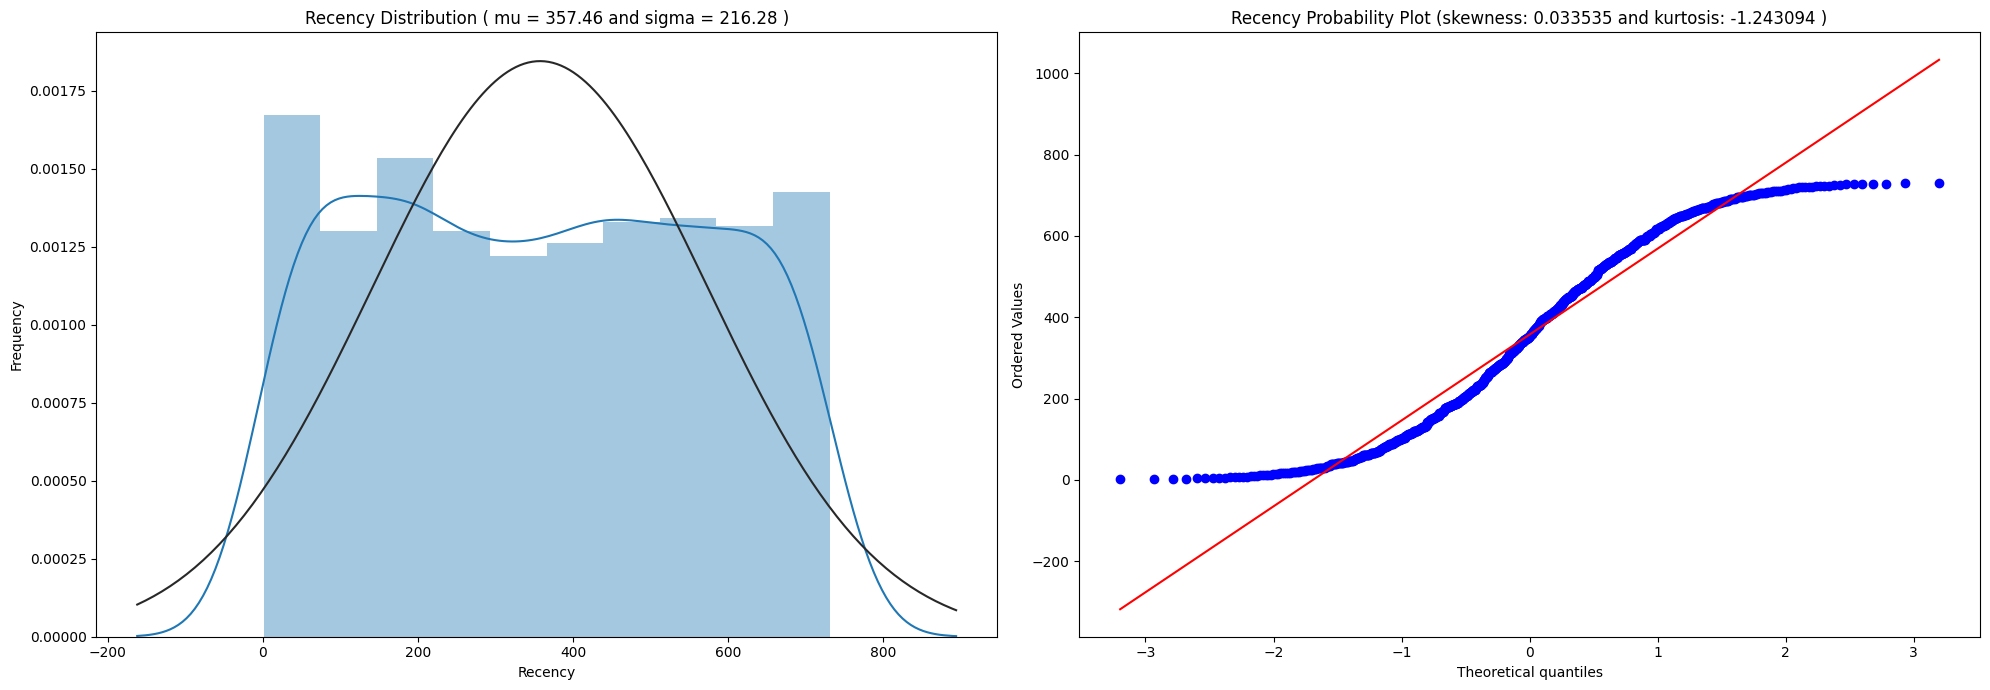

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot  # Import norm and probplot from scipy.stats

def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20, 7))

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    # Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    # QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

# Assuming customer_history_df.recency is available
QQ_plot(customer_history_df['recency'], 'Recency')


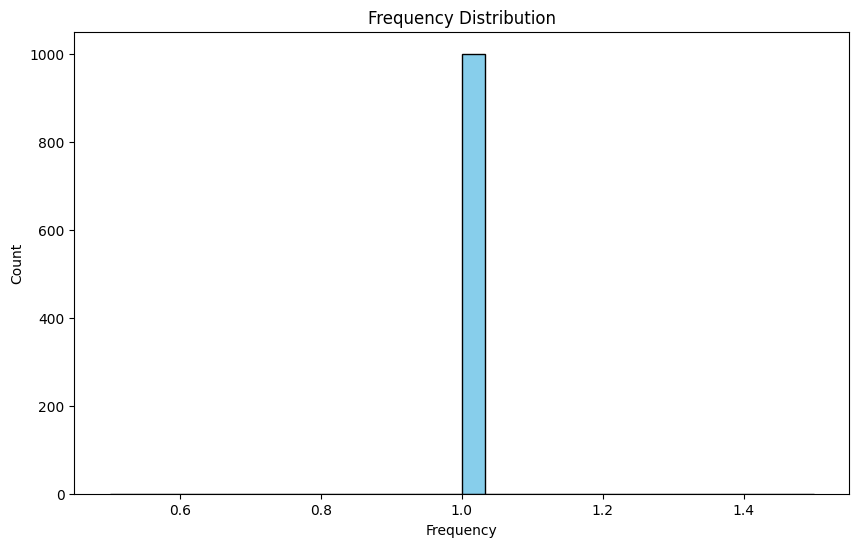

Index(['CustomerID', 'recency', 'frequency_x', 'frequency_y', 'frequency',
       'Frequency_x', 'Frequency_y', 'Frequency'],
      dtype='object')
     CustomerID  Frequency
0             1          1
1             2          1
2             3          1
3             4          1
4             5          1
..          ...        ...
995         996          1
996         997          1
997         998          1
998         999          1
999        1000          1

[1000 rows x 2 columns]


In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate Frequency
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Generate the frequency data
customer_freq = (
  data[['CustomerID', 'InvoiceNo']]
  .groupby(["CustomerID", 'InvoiceNo'])
  .size() # Using size() to count occurrences without resetting index
  .reset_index()
  .groupby(["CustomerID"])
  .size() # Counting occurrences per customer
  .reset_index(name='frequency') # Renaming column to 'frequency'
)

# Merge 'frequency' with 'customer_history_df'
customer_history_df = pd.merge(customer_history_df, frequency, on='CustomerID', how='left')

# Plotting the histogram for frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(customer_history_df['Frequency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency Distribution')
plt.show()

# Print the column names in customer_history_df
print(customer_history_df.columns)

# Print 'Frequency' column along with other columns
print(customer_history_df.loc[:, ['CustomerID', 'Frequency']])

<ipython-input-52-45903822bd8e>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


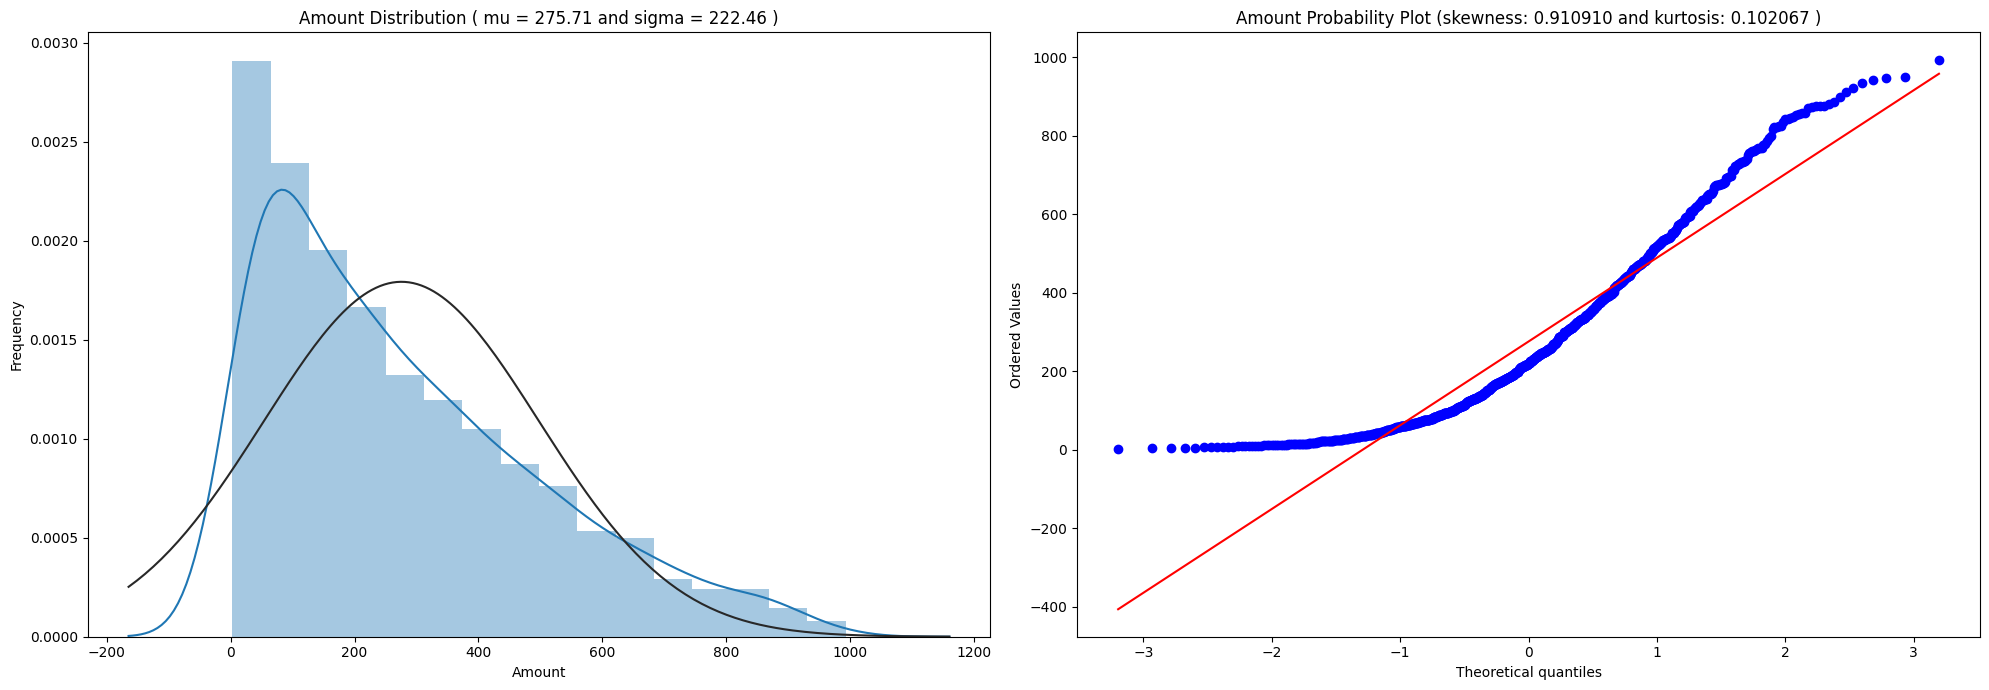

In [59]:
customer_monetary_val = data[['CustomerID', 'amount']].groupby("CustomerID").sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary_val)
QQ_plot(customer_history_df.amount, 'Amount')

# Calculate Monetary Value
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
monetary_value = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_value.columns = ['CustomerID', 'MonetaryValue']

In [33]:
customer_history_df.describe()

,CustomerID,recency,frequency_x,frequency_y,frequency,Frequency_x,Frequency_y,Frequency,amount
count,1000.0,1000.00000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.00000
mean,500.5,357.46500,1.0,1.0,1.0,1.0,1.0,1.0,275.71234
std,288.819436,216.38454,0.0,0.0,0.0,0.0,0.0,0.0,222.57308
min,1.0,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,2.76000
25%,250.75,169.50000,1.0,1.0,1.0,1.0,1.0,1.0,89.44500
50%,500.5,352.50000,1.0,1.0,1.0,1.0,1.0,1.0,219.62000
75%,750.25,546.25000,1.0,1.0,1.0,1.0,1.0,1.0,413.14500
max,1000.0,731.00000,1.0,1.0,1.0,1.0,1.0,1.0,993.00000


In [40]:
import math
from sklearn import preprocessing


customer_history_df['recency_log'] = customer_history_df['recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['frequency'].apply(math.log)
customer_history_df['amount_log'] = customer_history_df['amount'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = customer_history_df[feature_vector] #.as_matrix()


scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe()




,amount_log,recency_log,frequency_log
count,1.000000e+03,1.000000e+03,1000.0
mean,-7.247536e-16,4.440892e-16,0.0
std,1.000500e+00,1.000500e+00,0.0
min,-3.744144e+00,-5.254339e+00,0.0
25%,-6.081400e-01,-3.827700e-01,0.0
50%,2.017145e-01,3.121690e-01,0.0
75%,7.714125e-01,7.278994e-01,0.0
max,1.562028e+00,1.004407e+00,0.0


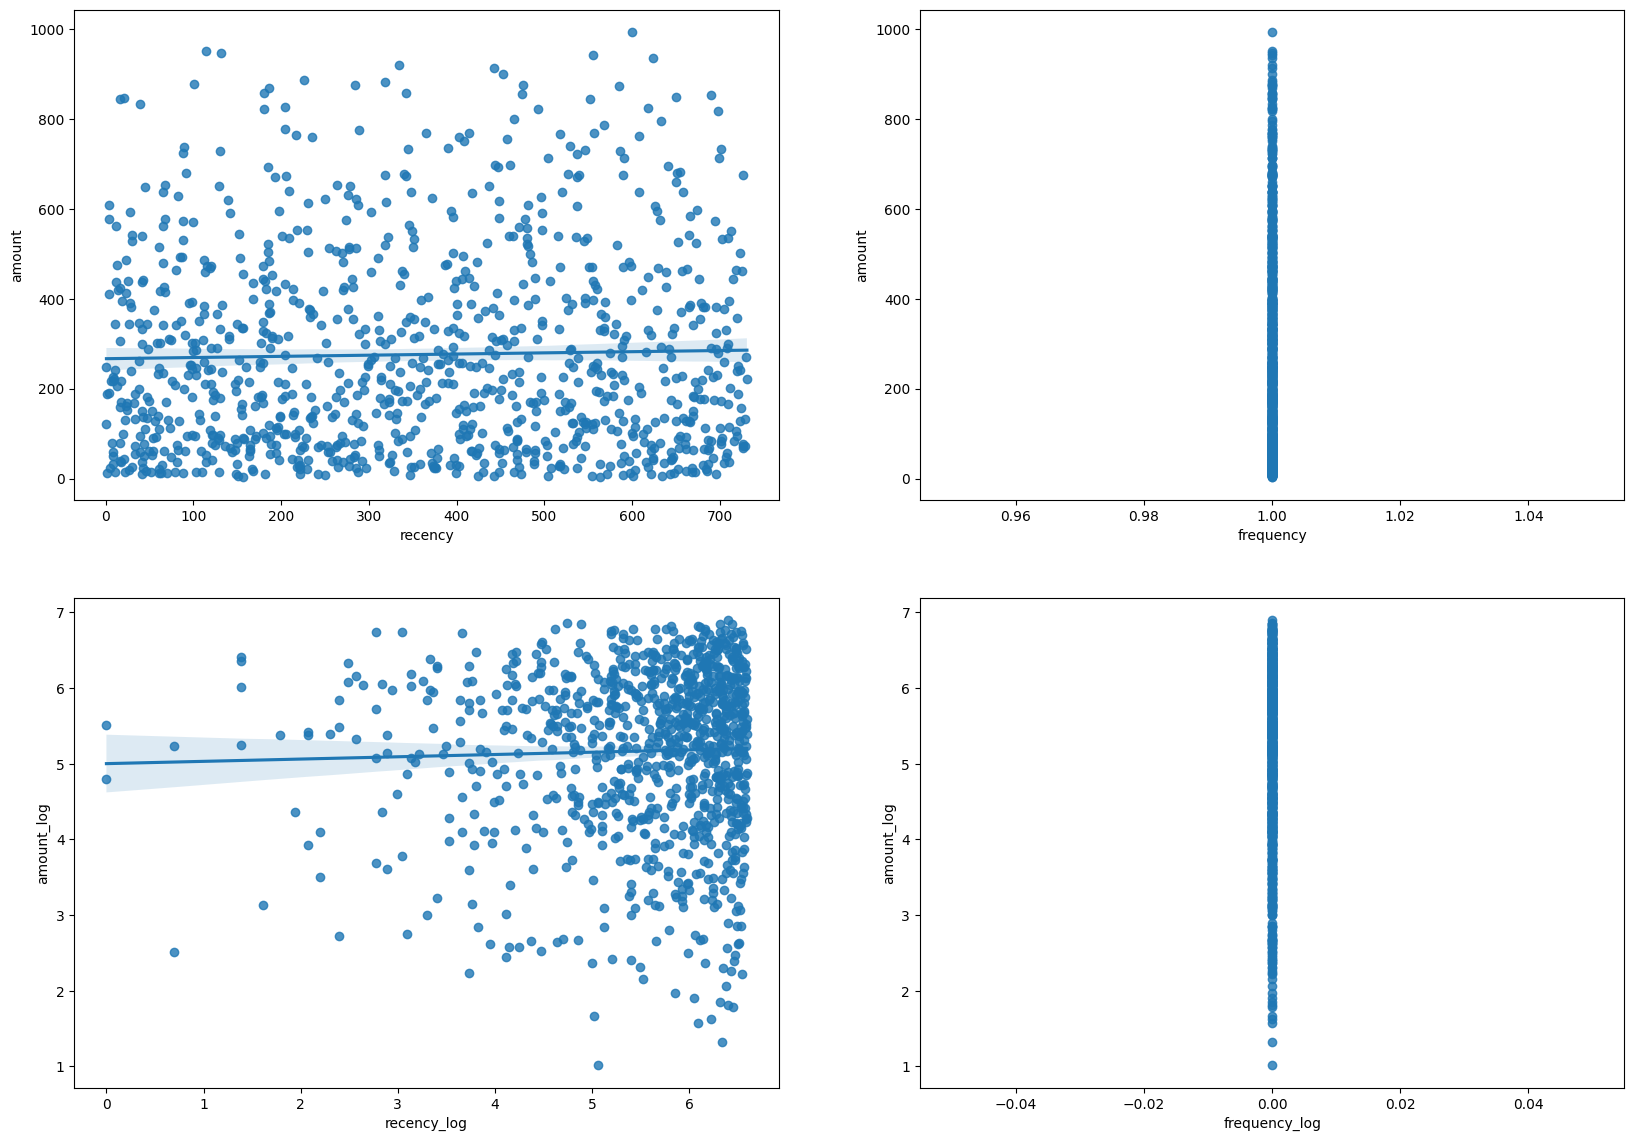

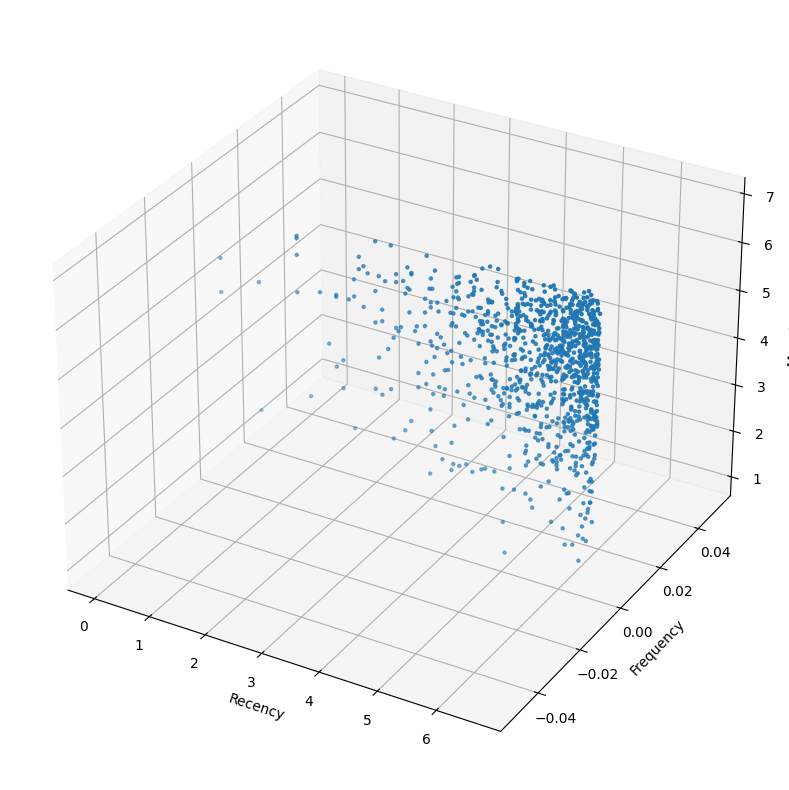

In [41]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='amount_log', data=customer_history_df)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

In [56]:
# Merge RFM metrics into one DataFrame
rfm = frequency.merge(customer_monetary_val, on='CustomerID')
rfm = rfm.merge(data[['CustomerID', 'Recency']].drop_duplicates(), on='CustomerID')

# Standardize or normalize the RFM features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency']])
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency'])


In [57]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
kmeans.fit(rfm_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

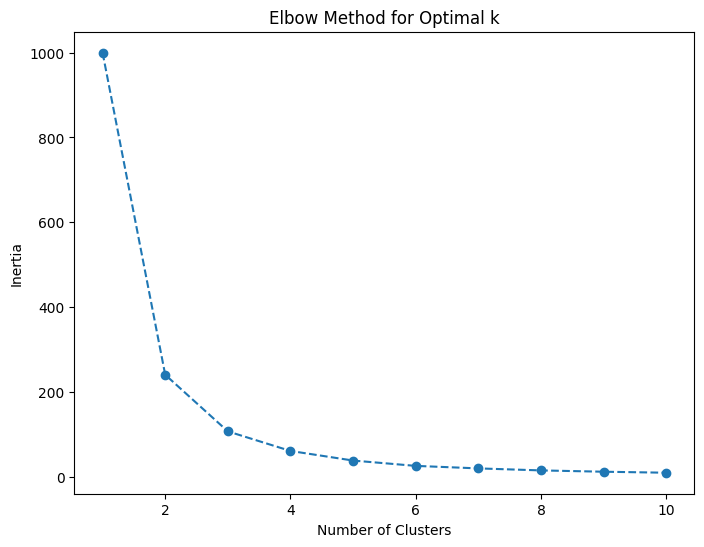

In [58]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):  # Test different numbers of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


<ipython-input-60-4cdec41932b3>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

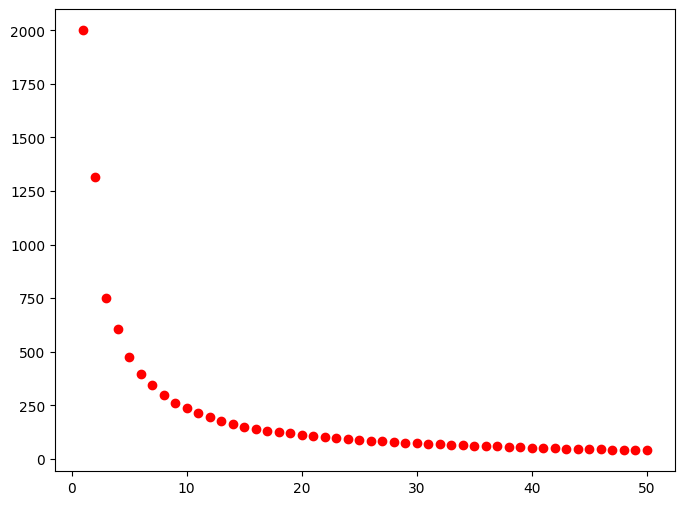

The best K sugest:  9


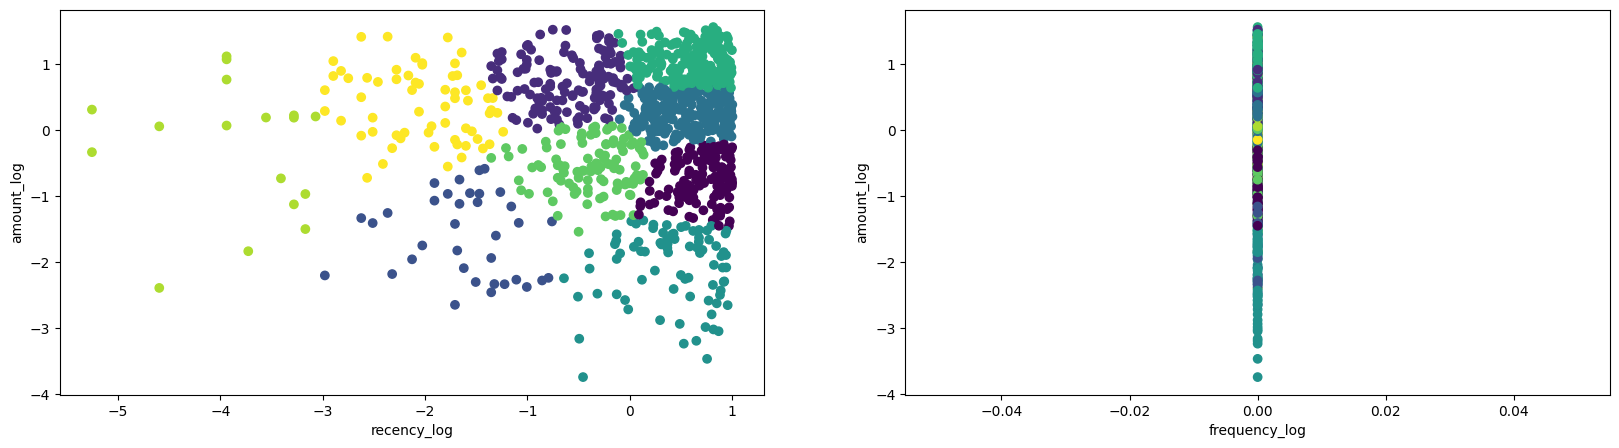

In [60]:
cl = 50
corte = 0.1

anterior = 100000000000000
cost = []
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k,
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia
    plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()

In [65]:
cluster_centers = dict()
features = ['amount',  'recency',  'frequency']

# Assuming the keys are populated in cluster_centers previously

for i in range(3, K_best+1, 2):
    if i in cluster_centers:
        print("For {} clusters, the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
        print("Centers of each cluster:")

        # Assuming 'scaler' is defined earlier in your code
        cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
        print(pd.DataFrame(np.exp(cent_transformed), columns=features))
        print('-' * 50)
    else:
        print("Cluster centers for {} clusters not found.".format(i))


Cluster centers for 3 clusters not found.
Cluster centers for 5 clusters not found.
Cluster centers for 7 clusters not found.
Cluster centers for 9 clusters not found.


In [66]:
items = list(data.Description.unique())  # Assuming 'Description' is a column in the 'data' DataFrame
grouped = data.groupby('InvoiceNo')  # Assuming 'InvoiceNo' is a column in the 'data' DataFrame

transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo', 'Description']]
transaction_dict = {item: 0 for item in items}
output_dict = dict()
temp = dict()

for rec in transaction_level.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['Description']
    transaction_dict = {item: 0 for item in items}
    transaction_dict.update({item: 1 for item in items if item in items_list})
    temp.update({invoice_num: transaction_dict})

new = [v for k, v in temp.items()]
transaction_df = pd.DataFrame(new)


In [67]:
def prune_dataset(input_df, length_trans = 2, total_sales_perc = 0.5,
                  start_item = None, end_item = None, TopCols = None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
    item_count = input_df.sum().sort_values(ascending = False).reset_index()
    total_items = sum(input_df.sum().sort_values(ascending = False))
    item_count.rename(columns={item_count.columns[0]:'item_name',
                               item_count.columns[1]:'item_count'}, inplace=True)
    if TopCols:
        input_df['total_items'] = input_df[TopCols].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[TopCols], item_count[item_count.item_name.isin(TopCols)]
    elif end_item > start_item:
        selected_items = list(item_count[start_item:end_item].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items],item_count[start_item:end_item]
    else:
        item_count['item_perc'] = item_count['item_count']/total_items
        item_count['total_perc'] = item_count.item_perc.cumsum()
        selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items], item_count[item_count.total_perc < total_sales_perc]

In [68]:
output_df, item_counts = prune_dataset(input_df=transaction_df, length_trans=2,start_item = 0, end_item = 15)
print('Total of Sales Amount by the Top 15 Products in Sales Events (Invoice): {:.2f}'.format(AmoutSum[Top15ev].sum()))
print('Number of Sales Events:', output_df.shape[0])
print('Number of Products:', output_df.shape[1])

item_counts

Total of Sales Amount by the Top 15 Products in Sales Events (Invoice): 3578.61
Number of Sales Events: 0
Number of Products: 15


,item_name,item_count
0,Maintain by show including feel which.,1
1,Tonight television newspaper.,1
2,Itself cell magazine voice north boy.,1
3,Put task space network base.,1
4,Across change team me challenge possible.,1
5,Thousand relate soon.,1
6,Especially international difficult black.,1
7,Term measure treatment eye high sit.,1
8,Paper end available skin fire live why.,1
9,Budget though size condition.,1
